In [16]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import csv
import os


In [26]:
dataset =pd.read_csv('data_project/Mall_Customers.csv')

In [27]:
#printing first 10 rows of the dataset
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [28]:
#total rows and columns in the dataset
dataset.shape

(200, 5)

In [29]:
#there are no missing values as all the columns has 200 entries properly
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
#Features selecction for the  model
#considering only 2 features(Annuak income and spending score) and no label available
X= dataset.iloc[:,[3,4]].values

In [32]:
#buildin the model
#KMeans algorithm to decide the optimum cluster number, KMeans++ using Elbow Mmethod
#to figure out for KMean, I will use ElBOW Method onKMEANS ++ Clculation
from sklearn.cluster import KMeans
wcss =[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing  averaging
for i in range(1,11):
    kmeans =KMeans(n_clusters =i, init='k-means++', random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

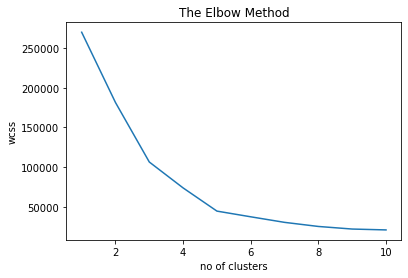

In [34]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
kmeansmodel=KMeans(n_clusters=5, init='k-means++',random_state=0)
y_kmeans =kmeansmodel.fit_predict(X)

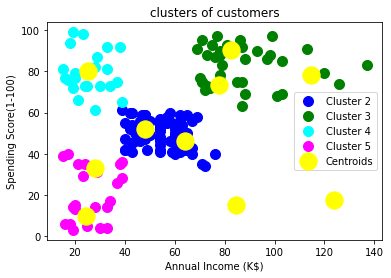

In [43]:
# plt.scatter (X[y_kmeans ==0,0],X[y_kmeans ==0,1],s=100,c='red',label='Cluster 1')
plt.scatter (X[y_kmeans ==1,0],X[y_kmeans ==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter (X[y_kmeans ==2,0],X[y_kmeans ==2,1],s=100,c='green',label='Cluster 3')
plt.scatter (X[y_kmeans ==3,0],X[y_kmeans ==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter (X[y_kmeans ==4,0],X[y_kmeans ==4,1],s=100,c='magenta',label='Cluster 5')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow', label='Centroids')


plt.title('clusters of customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# Clustering Documents with TFIDF and KMeans

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [4]:
data  = pd.read_json('data_project/combined.json',lines =True)
data.head()


,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]


In [5]:
tfidf =TfidfVectorizer(min_df =5,
                       max_df = 0.95,
                       max_features = 8000,
                       stop_words ='english')
tfidf.fit(data.contents)
text =tfidf.transform(data.contents)


La agrupacion en clusteres es una operacion no supervizada y KMeans requiere que especifiquemos el numero de clustere.Un esfoque simple es trazar el SSE para un rango de tamaños de conglomerados.Buscamos el codo donde el SSE comienza  estabilizarse MiniBatchKMeans Introduce algo de ruido, por lo que eleve el lote y los tamaños de inicio mas altos.Desafotunadamente, la implementacion regular de kMeans es demaciada lenta.Notara de diferentes estados aleatorios generaran graficos diferentes.

Fit2 clusters
Fit4 clusters
Fit6 clusters
Fit8 clusters
Fit10 clusters
Fit12 clusters
Fit14 clusters
Fit16 clusters
Fit18 clusters
Fit20 clusters


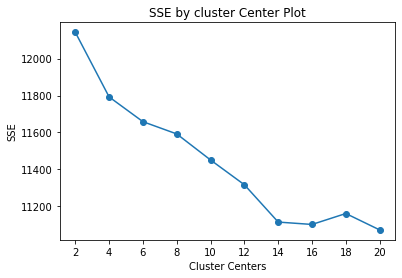

In [7]:
def find_optimal_clusters(data, max_k):
    iters = range(2,max_k+1, 2)
    
    sse =[]
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size =1024, batch_size=2048, random_state = 20).fit(data).inertia_)
        print('Fit{} clusters'.format(k))
        
    f, ax =plt.subplots(1,1)
    ax.plot(iters,sse,marker ='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by cluster Center Plot')
find_optimal_clusters(text,20)

In [8]:
clusters =MiniBatchKMeans(n_clusters = 14, init_size=1024, batch_size=2048,random_state=20).fit_predict(text)

Aqui trazamos los clusteres generados por nuestra operacion KMeans. Una grafica usa PCA, que es mejor para capturar la estructura globalde los datos.El otro usa TSNE, que es mejor para capturar las relaciones entre vecinos. Para acelerar el proceso  con TSNE, tomo muestras de 3000documentos y realizo una rteduccion de dimeciones PCA 50 n los datos primero

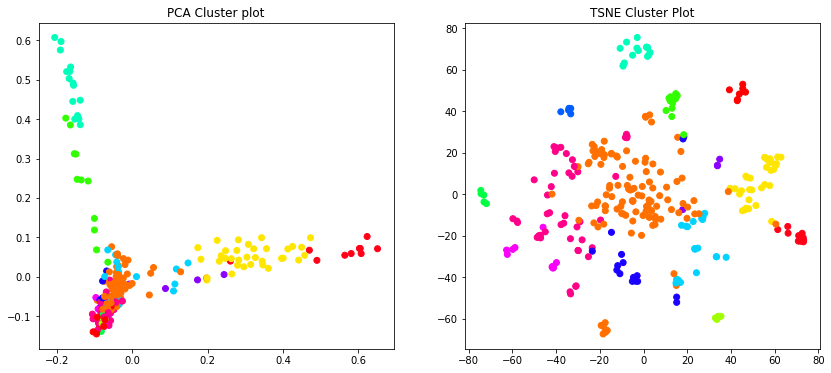

In [9]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]),size=3000,replace=False)
    
    pca =PCA(n_components =2).fit_transform(data[max_items,:].todense())
    tsne =TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]),size=300,replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f,ax = plt.subplots(1,2,figsize=(14,6))
    ax[0].scatter(pca[idx,0],pca[idx,1],c =label_subset)
    ax[0].set_title('PCA Cluster plot')
    ax[1].scatter(tsne[idx,0],tsne[idx,1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text,clusters)
    
